In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [15]:
training_path = "/Users/cipri/Downloads/DataScience:MLTest/training.csv"
testing_path = "/Users/cipri/Downloads/DataScience:MLTest/test.csv"

In [16]:
test_data = pd.read_csv(testing_path)
data = pd.read_csv(training_path)

# Trying out YDataProfiling


In [17]:
from ydata_profiling import ProfileReport

Basic understanding of the problem

In [18]:
#profile = ProfileReport(data, title="Insulet Profiling Report", explorative=True)

In [19]:
#profile.to_file("/Users/cipri/PycharmProjects/Insultet/report.html")

Text(0.5, 1.0, 'Distribution of target variable')

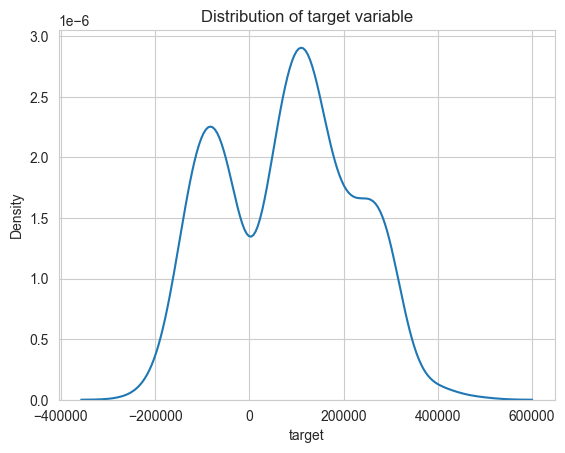

In [20]:
sns.kdeplot(data=data, x="target")
plt.title("Distribution of target variable")

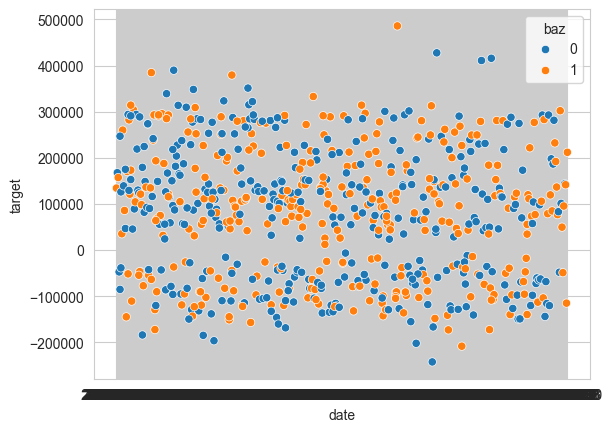

In [21]:
# is there any relationship between date and the target?
sns.scatterplot(data=data, x="date", y="target", hue="baz")
plt.show()

In [22]:
data["date"] = pd.to_datetime(data["date"])

In [23]:
data["year"] = data["date"].dt.year

<Axes: xlabel='year'>

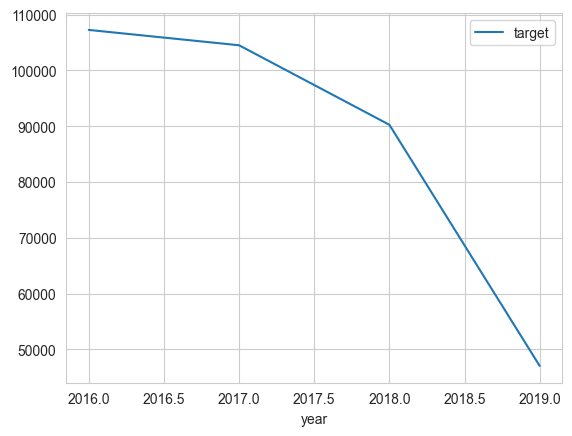

In [24]:
data.groupby("year").agg({"target": "median"}).plot()

In [25]:
data.shape

(678, 20)

In [26]:
features = ['baz', 'xgt', 'qgg', 'lux','wsg', 'yyz', 'drt', 'gox', 'foo', 'boz', 'fyt', 'lgh', 'hrt', 'juu']
target = ['target']

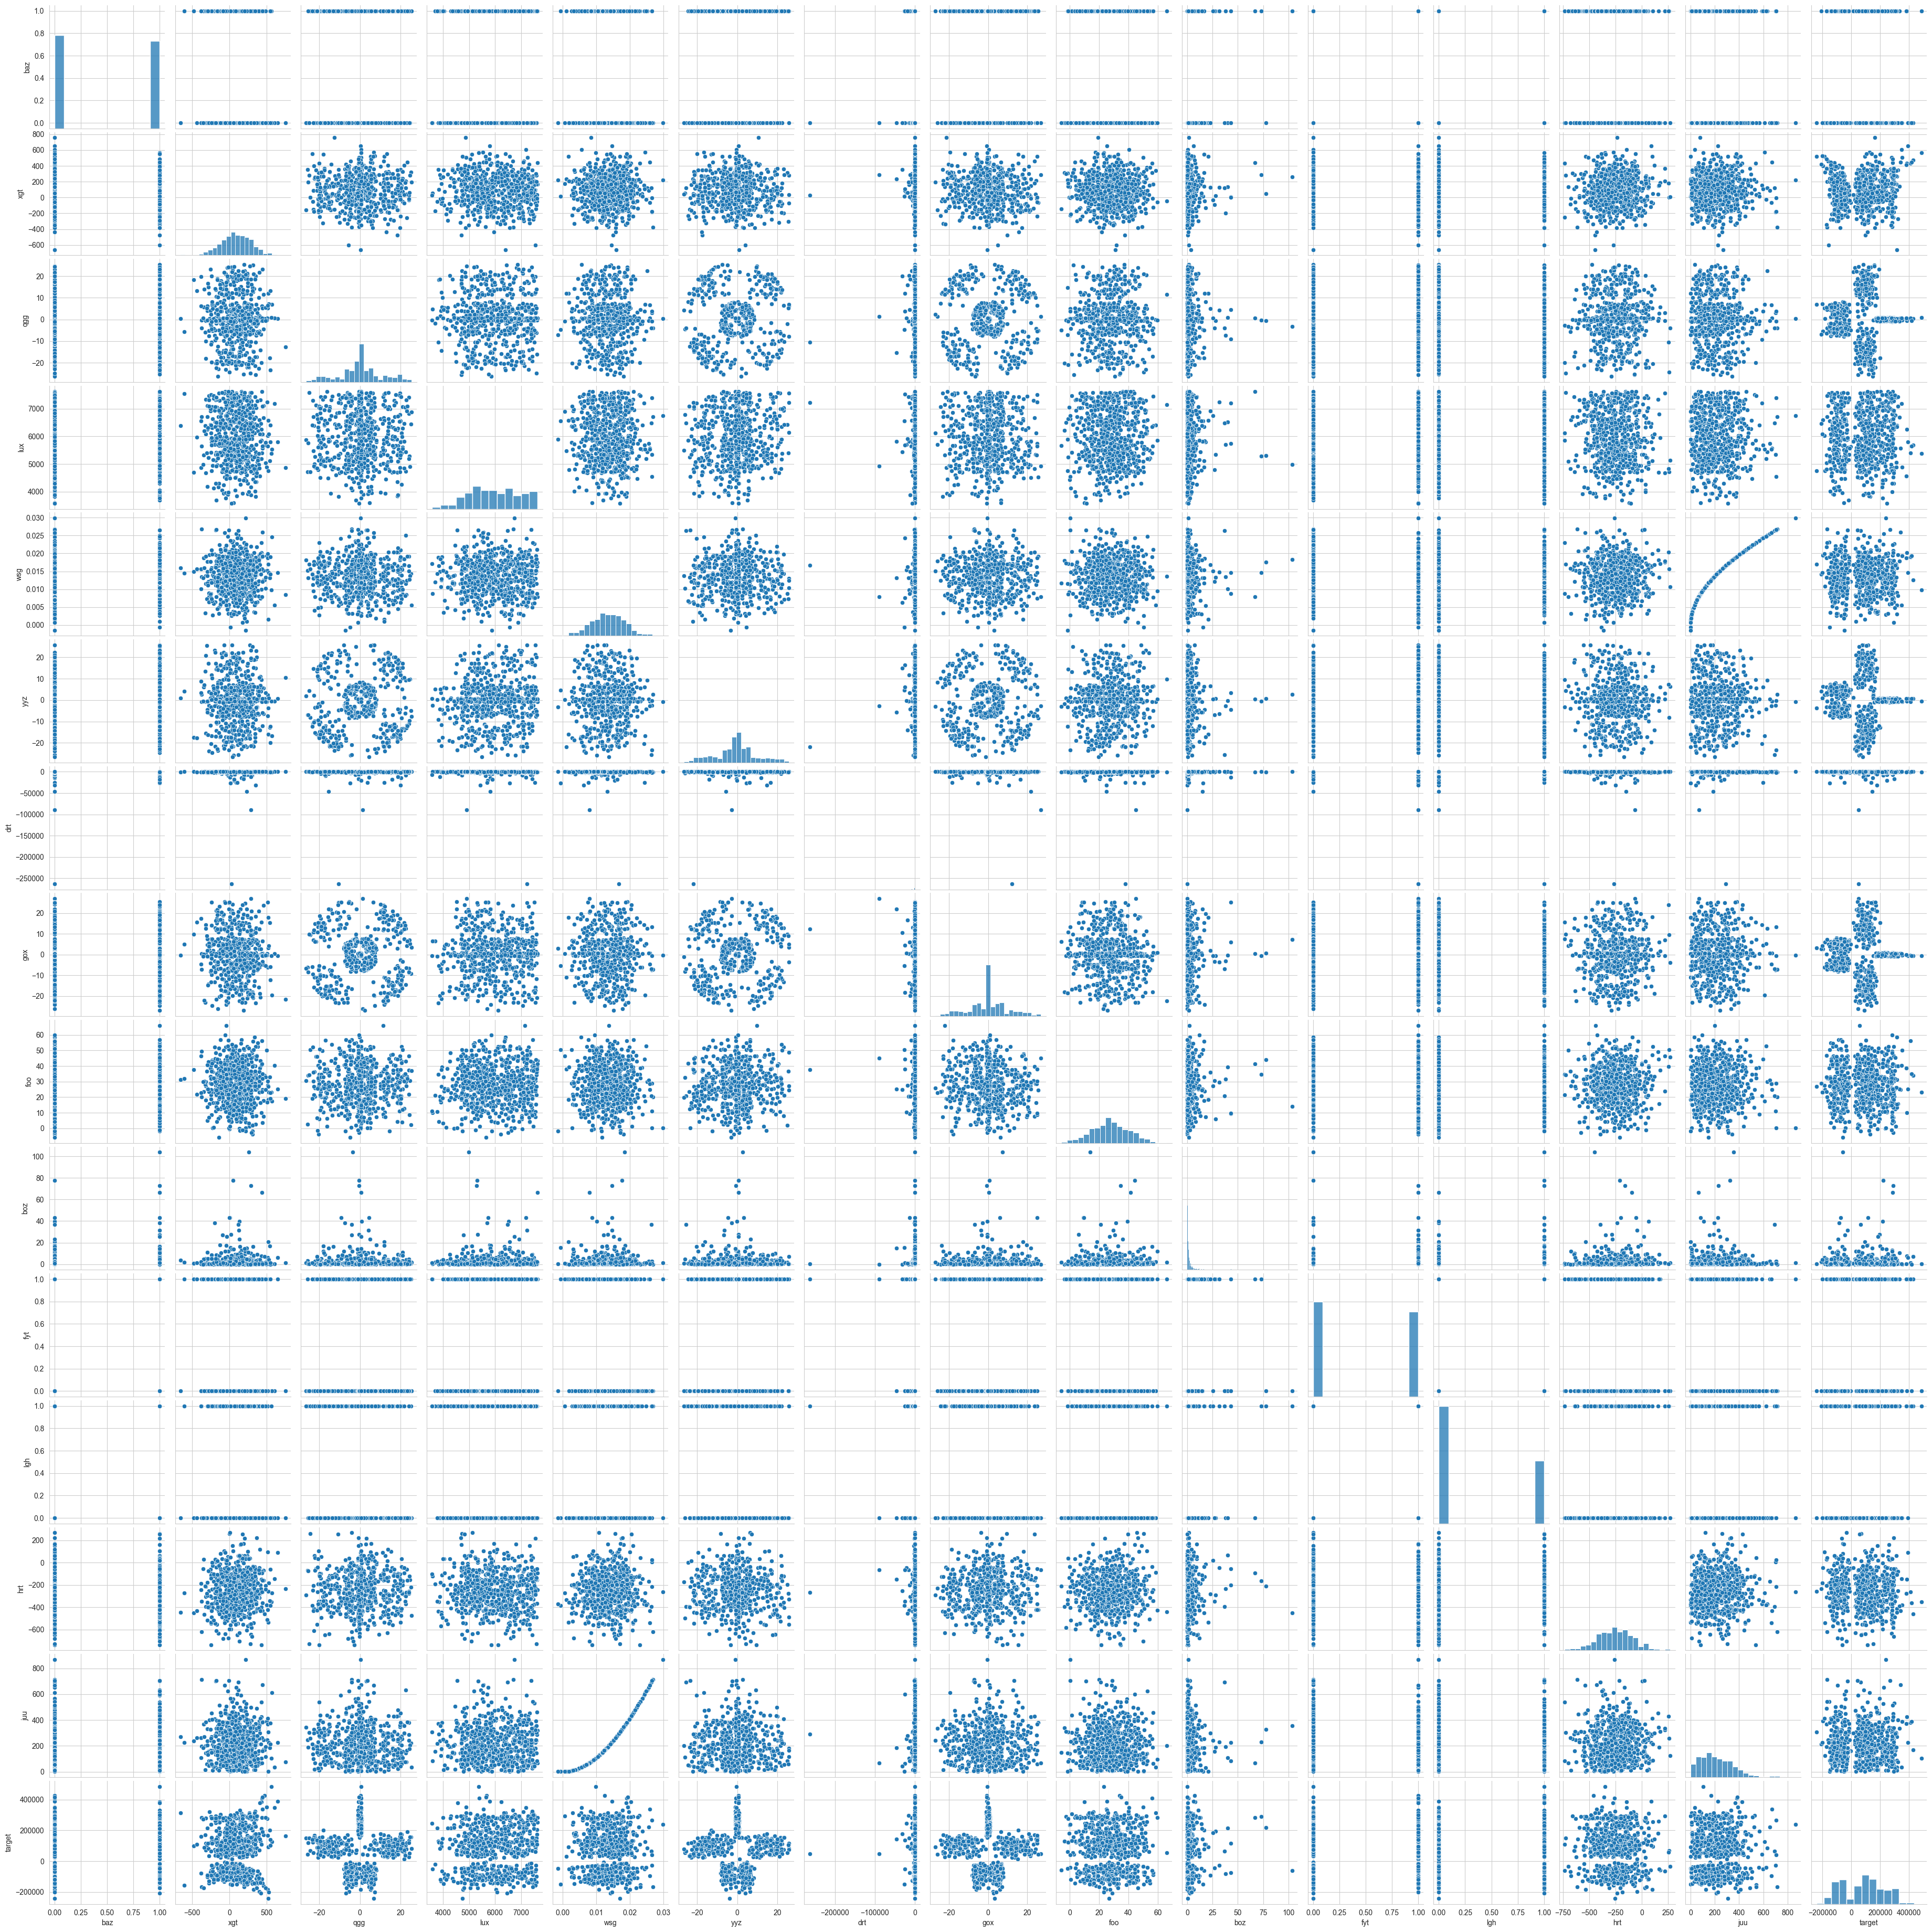

In [27]:
sns.pairplot(data[features+target])
plt.show()

In [28]:
aux = data[data["year"]==2016].copy()
aux.shape

(194, 20)

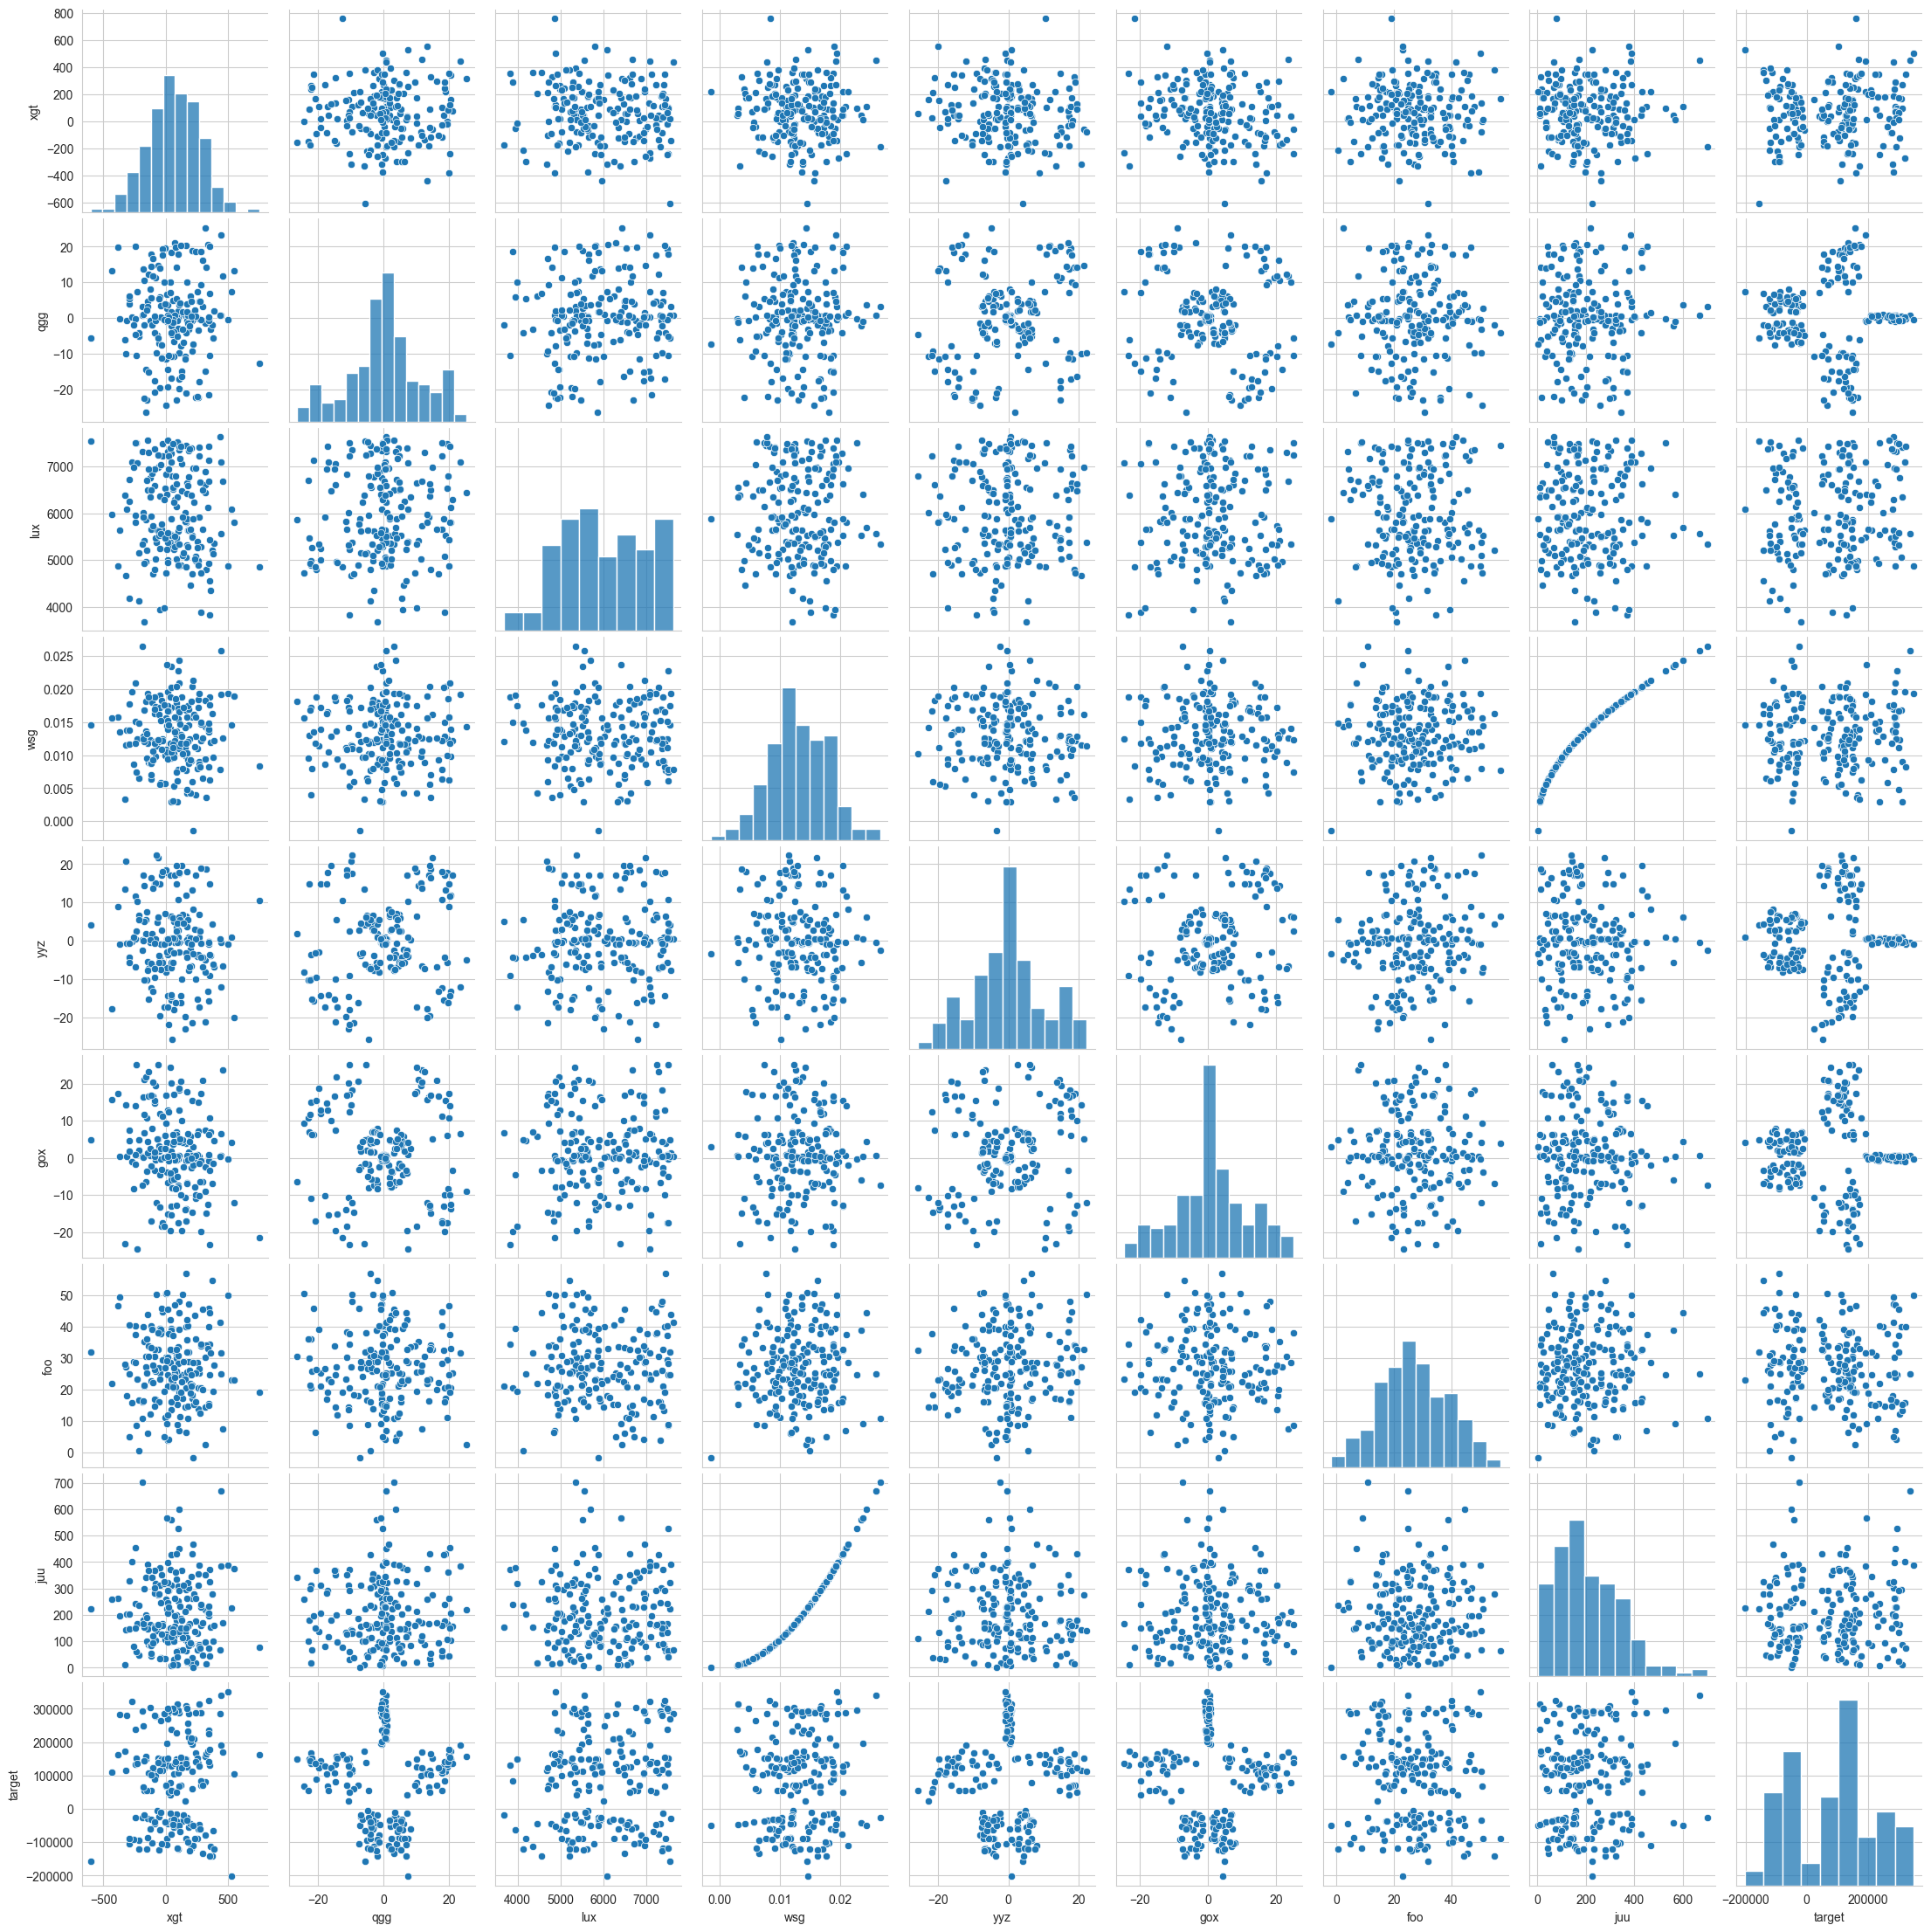

In [29]:
features = ['xgt', 'qgg', 'lux','wsg', 'yyz', 'gox', 'foo','juu']
target = ['target']
sns.pairplot(aux[features+target])
plt.show()

<Axes: xlabel='target', ylabel='Density'>

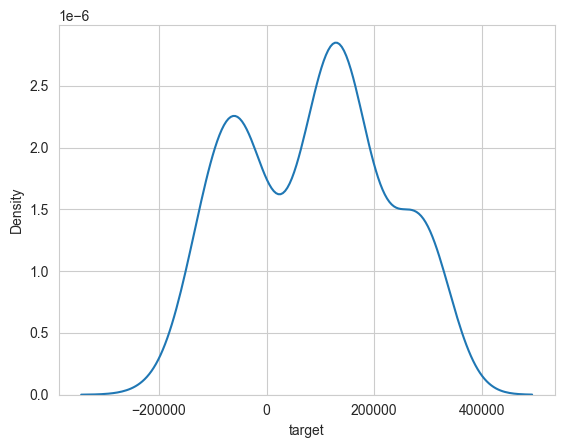

In [30]:
sns.kdeplot(aux, x="target")

In [31]:
correlation_matrix = aux[features+target].corr()

Text(0.5, 1.0, 'Correlation Heatmap')

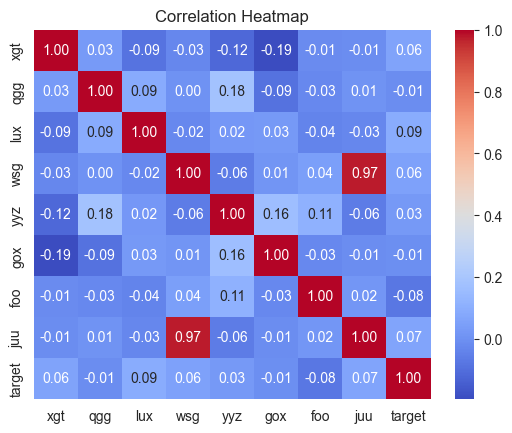

In [32]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")

In [33]:
data_flower = data[data["image class"] == "flower"]

<Axes: xlabel='target', ylabel='Density'>

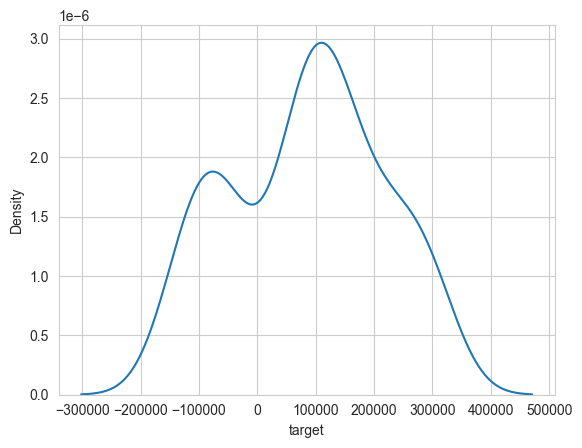

In [34]:
sns.kdeplot(data=data_flower, x="target")

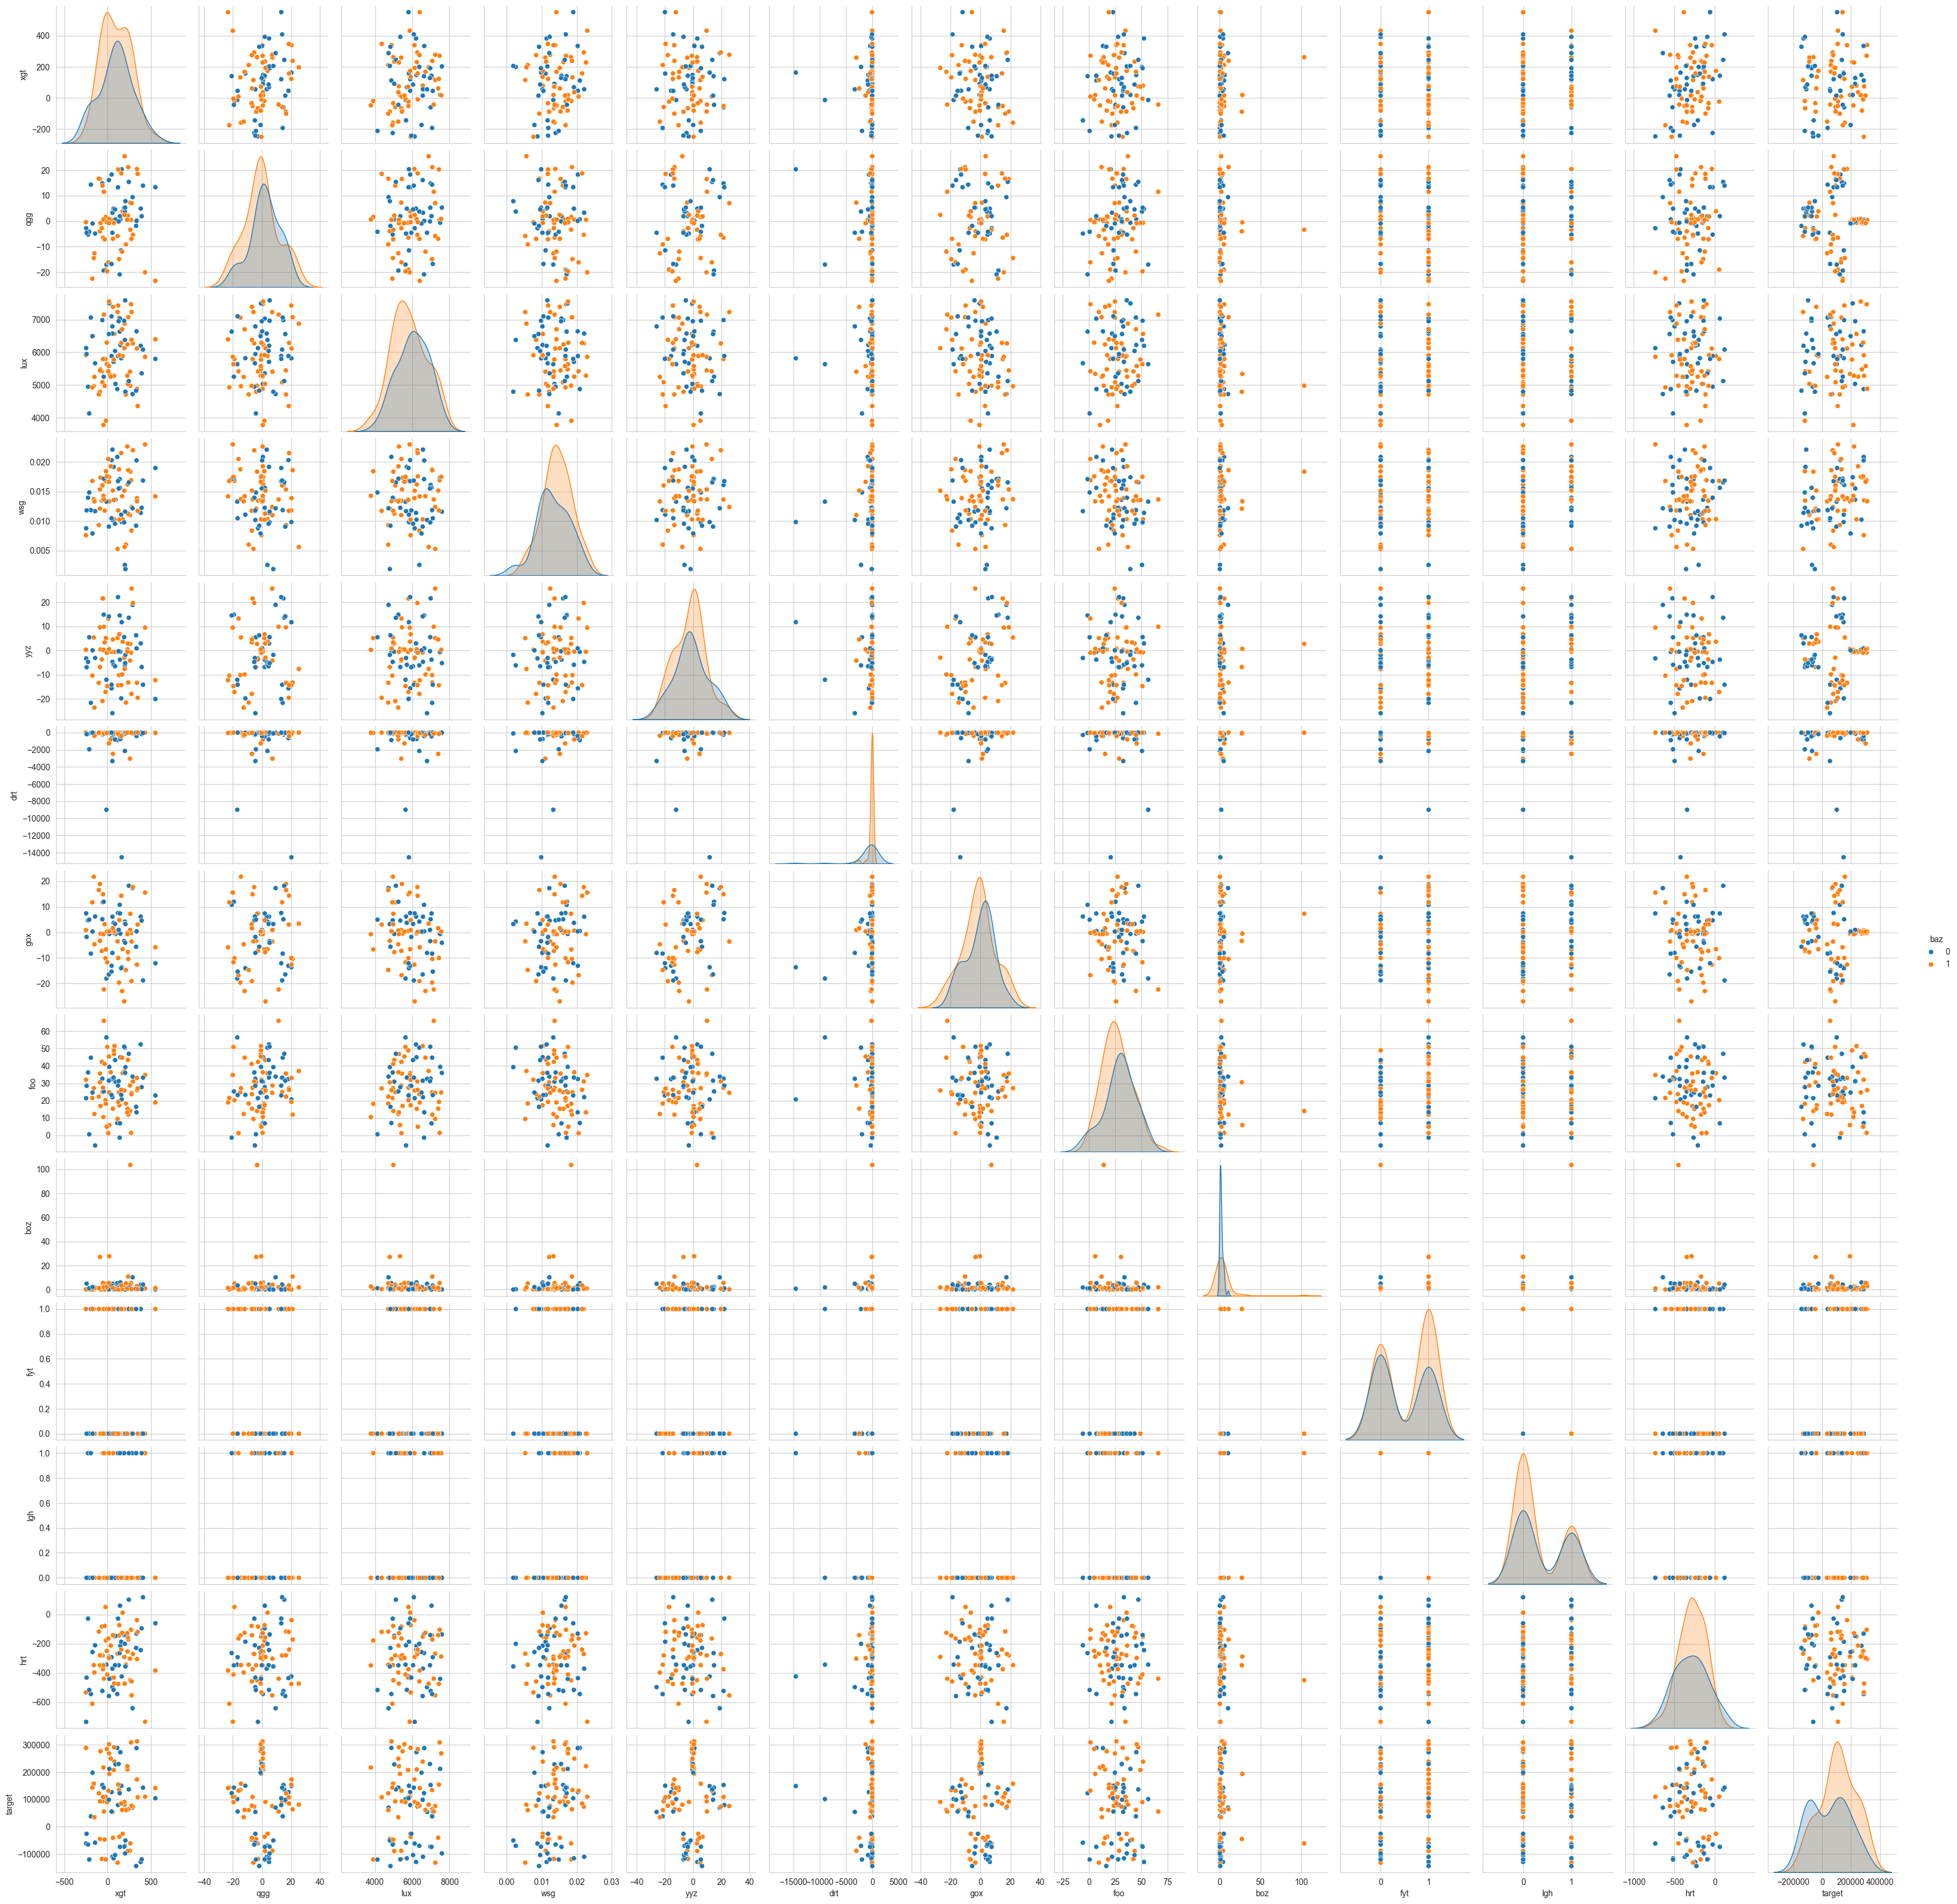

In [35]:
features = ['baz', 'xgt', 'qgg', 'lux','wsg', 'yyz', 'drt', 'gox', 'foo', 'boz', 'fyt', 'lgh', 'hrt']
target = ['target']
sns.pairplot(data_flower[features+target], hue="baz")
plt.show()

This show presence of a mixed distribution problem.

In [36]:
prefix_path = "/Users/cipri/Downloads/DataScience:MLTest/"

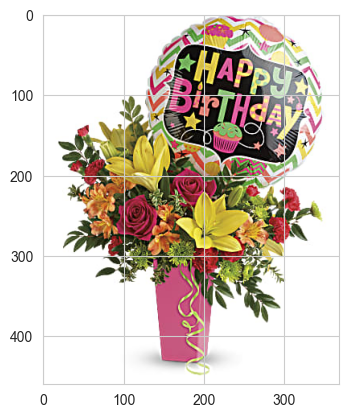

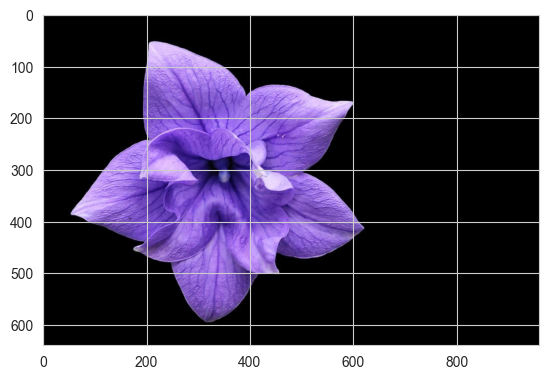

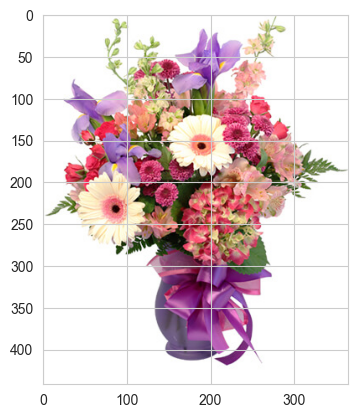

In [37]:
for image_path in data_flower[data_flower["baz"]==1]["image"].tolist()[:3]:
    image = mpimg.imread(prefix_path+image_path)
    plt.imshow(image)
    plt.show()

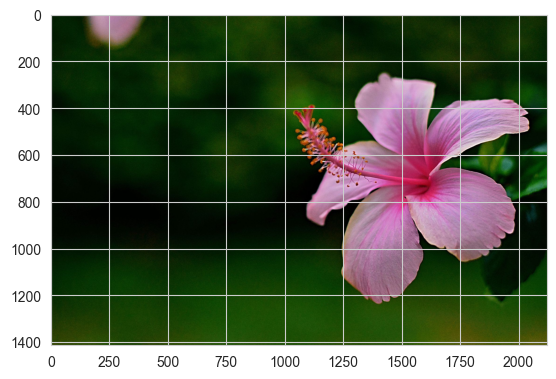

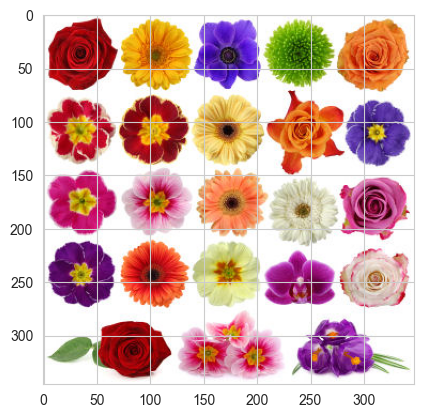

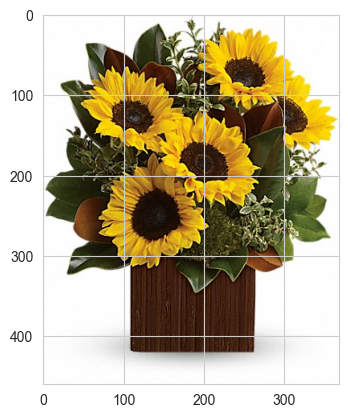

In [38]:
for image_path in data_flower[data_flower["baz"]==0]["image"].tolist()[:3]:
    image = mpimg.imread(prefix_path+image_path)
    plt.imshow(image)
    plt.show()

Lets focus on flowers-class data, idenfying the class - and taking it - as subgroup could be helpful for the predictive model.

In [39]:
data_flower_ts = data_flower[data_flower["baz"]==1]

<Axes: xlabel='target', ylabel='Density'>

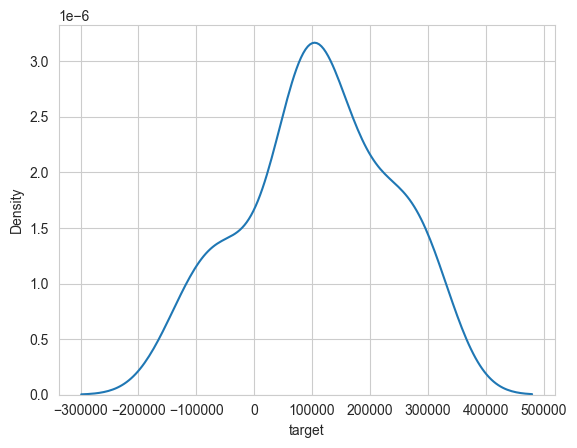

In [40]:
sns.kdeplot(data_flower_ts, x="target")

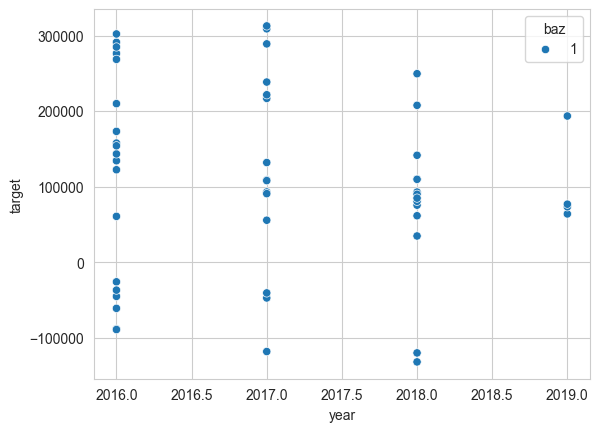

In [41]:
sns.scatterplot(data=data_flower_ts, x="year", y="target", hue="baz")
plt.show()

In [42]:
features = ['xgt', 'qgg', 'lux','wsg', 'yyz', 'drt', 'gox', 'foo', 'boz', 'fyt', 'lgh', 'hrt',"year"]
target = ['target']

In [43]:
 correlation_flowers = data_flower_ts[features+target].corr()

Text(0.5, 1.0, 'Correlation Heatmap')

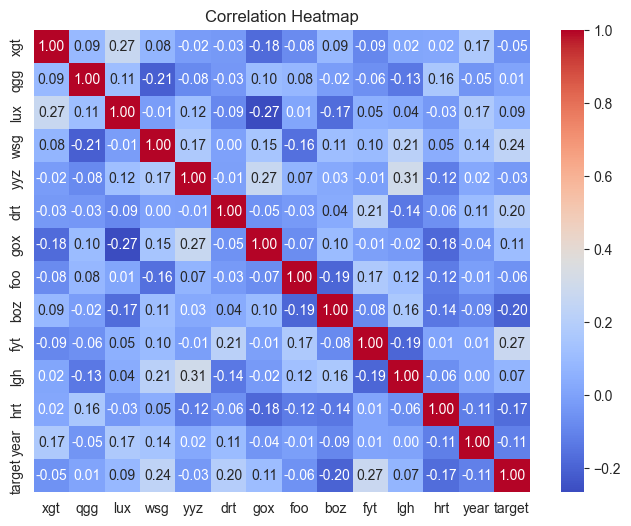

In [44]:
plt.figure(figsize=(8, 6)) 
sns.heatmap(correlation_flowers, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")

# Data Transformations

In [51]:
data.columns

Index(['image', 'image class', 'date', 'bar', 'baz', 'xgt', 'qgg', 'lux',
       'wsg', 'yyz', 'drt', 'gox', 'foo', 'boz', 'fyt', 'lgh', 'hrt', 'juu',
       'target', 'year'],
      dtype='object')

<Axes: xlabel='bar', ylabel='Density'>

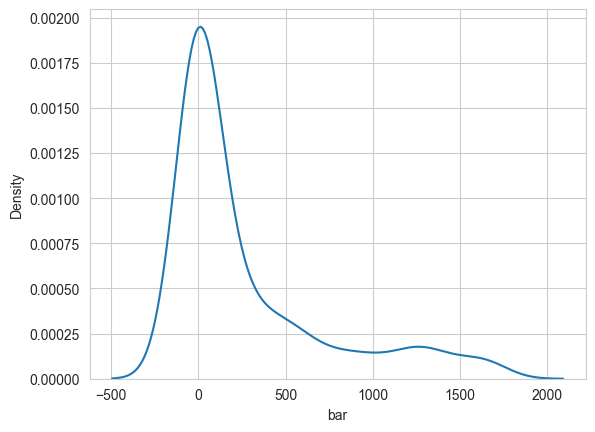

In [53]:
sns.kdeplot(data=data, x="bar")

In [55]:
sample = data.sample(n=50, random_state=0)

In [57]:
sample = sample[['bar', 'baz', 'xgt', 'qgg', 'lux',
       'wsg', 'yyz', 'drt', 'gox', 'foo', 'boz', 'fyt', 'lgh', 'hrt', 'juu',
       'target']].copy()

In [59]:
sample.reset_index(drop=True, inplace=True)

In [62]:
features = ['bar', 'baz', 'xgt', 'qgg', 'lux','wsg', 'yyz', 'drt', 'gox', 'foo', 'boz', 'fyt', 'lgh', 'hrt', 'juu']

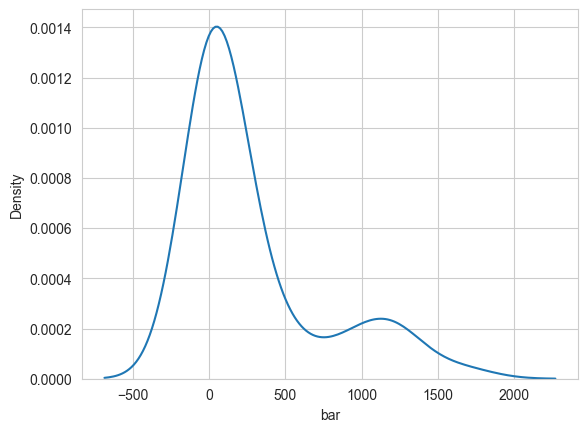

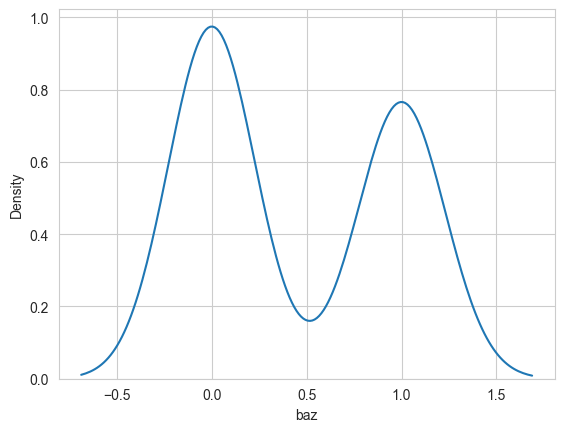

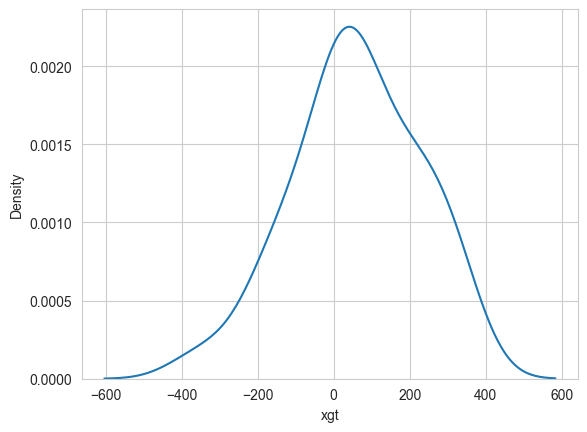

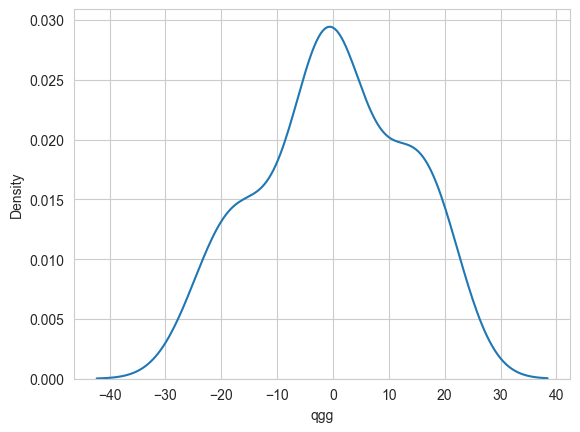

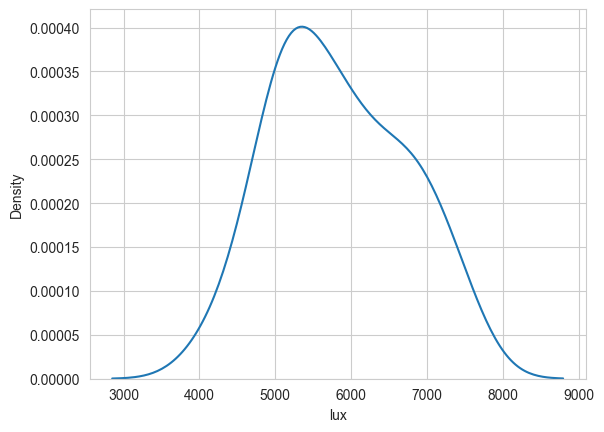

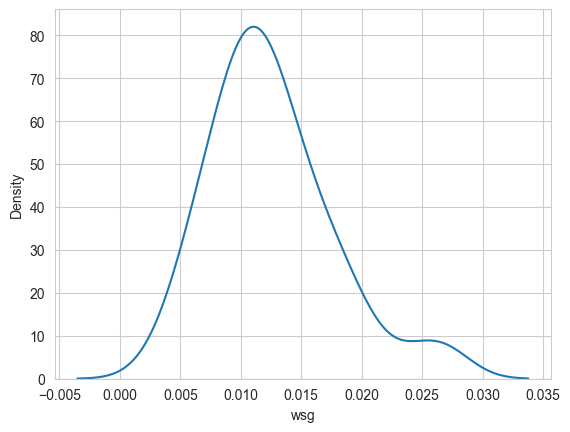

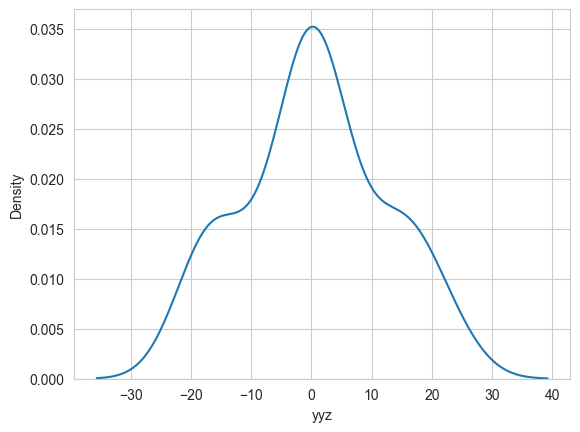

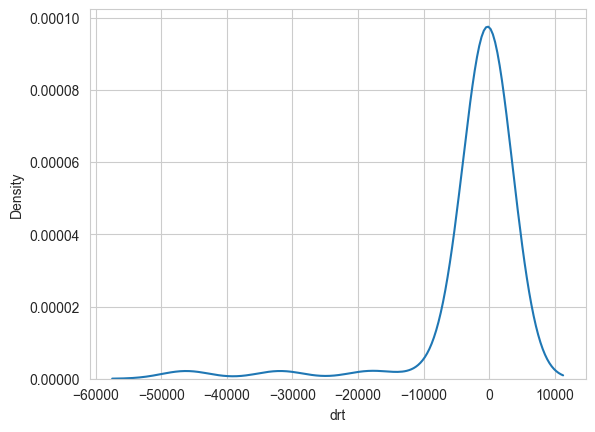

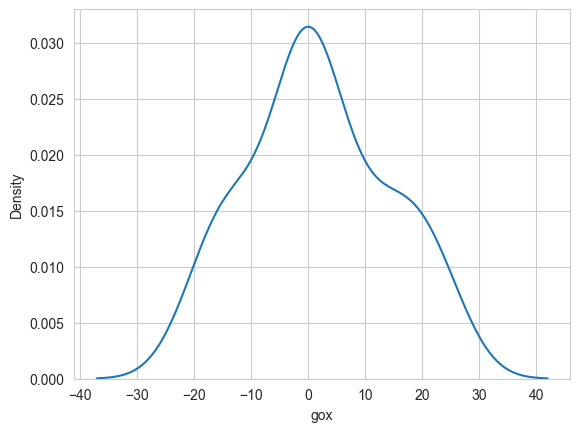

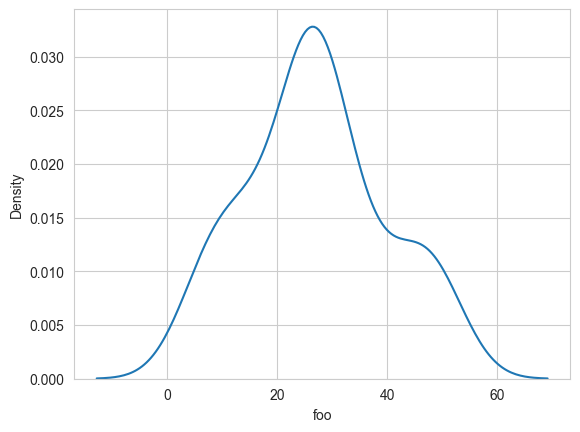

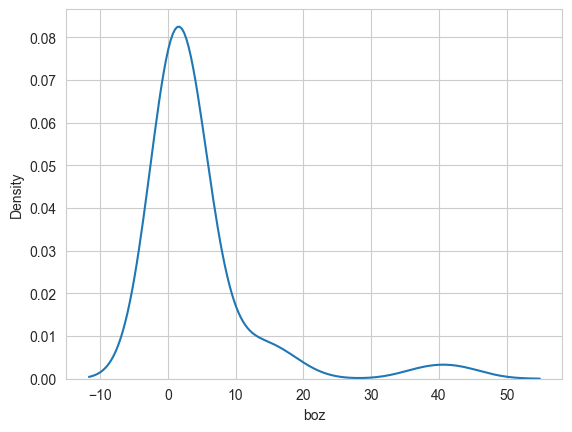

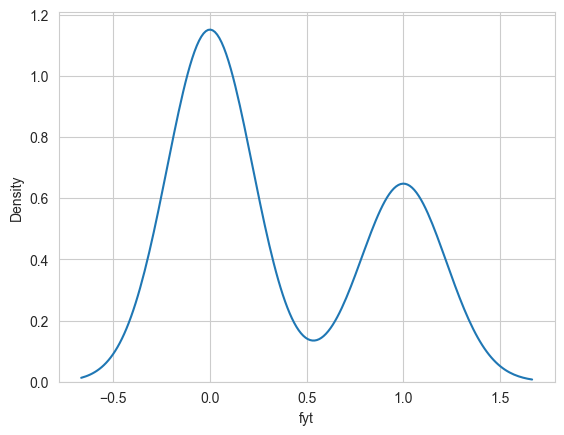

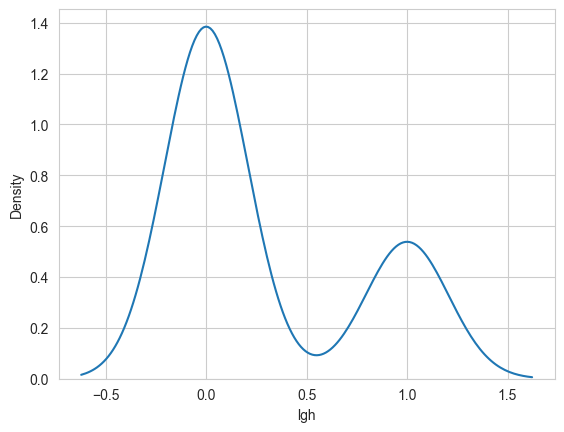

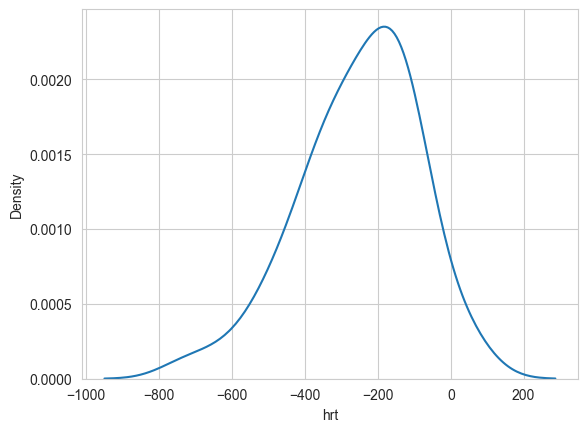

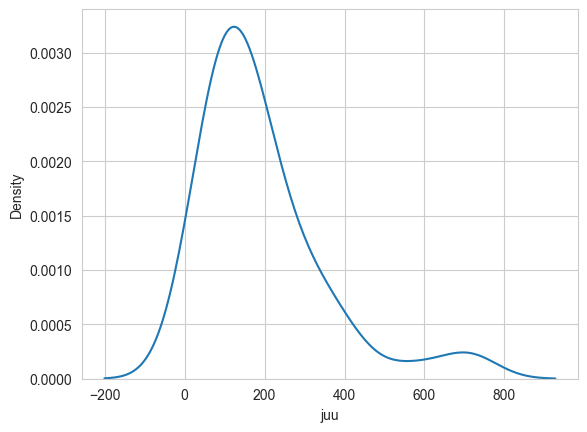

In [64]:
for feature in features:
    sns.kdeplot(data=sample, x=feature)
    plt.show()

In [77]:
sample["hrt"]  = sample["hrt"] - np.min(sample["hrt"]) + 1

# Initial proposal: RandomForest w/full dataset

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [46]:
label_encoder = LabelEncoder()

In [47]:
#data["drt_shifted"] = data["drt"]-data["drt"].min()+1
#data["drt_shifted_log"] = np.log(data["drt_shifted"])
#data["boz_log"] = np.log(data["boz"])

In [48]:
train_df, test_df = train_test_split(data, test_size=0.1, random_state=42)

In [49]:
features = ['bar', 'baz', 'xgt', 'qgg', 'lux', 'wsg', 'yyz', 'drt', 'gox', 'foo', 'boz', 'fyt', 'lgh', 'hrt', 'juu']
target = ['target']

regressor = RandomForestRegressor()

X_train = train_df[features]
y_train = train_df["target"].tolist()

X_eval = test_df[features]
y_eval = test_df["target"].tolist()

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_eval)
mse = mean_squared_error(y_eval, y_pred)  # Mean Squared Error
print("RMSE",np.sqrt(mse))

RMSE 45359.222060615626


In [50]:
{{{{}}}}

TypeError: unhashable type: 'dict'

In [ ]:
len(regressor.feature_names_in_)

In [ ]:
# test model
raw_input = [{"bar": 0,
 "baz": 1,
 "xgt": 20,
 "qgg": 1,
 "lux": 2,
 "wsg": 3,
 "yyz": 4,
 "drt": 5,
 "gox": 5,
 "foo": 6,
 "boz":7,
 "fyt": 8,
 "lgh": 9,
 "hrt":10,
 "juu": 11}]


In [ ]:
print(features)

In [ ]:
import joblib

In [ ]:
def wrapper(raw_data):
    df = pd.DataFrame(raw_data)
    #df["date"] = pd.to_datetime(df["date"])
    #df["year"] = df["date"].dt.year
    feature_names = ['bar', 'baz', 'xgt', 'qgg', 'lux', 'wsg', 'yyz', 'drt', 'gox', 'foo', 'boz', 'fyt', 'lgh', 'hrt', 'juu']
    return df[feature_names]

In [ ]:
payload = wrapper(raw_input)

In [ ]:
joblib.dump(regressor, "trained_model.pkl")

In [ ]:
input_df = pd.DataFrame(payload)
input_df.shape

In [ ]:
regressor.predict(input_df)

In [ ]:
from pydantic import BaseModel

In [ ]:
class PredictionRequest(BaseModel):
    bar: float
    baz: float
    xgt: float
    qgg: float
    lux: float
    wsg: float
    yyz: float
    drt: float
    gox: float
    foo: float
    boz: float
    fyt: float
    lgh: float
    hrt: float
    juu: float

In [ ]:
PredictionRequest.dict()

# Second iteration

In [176]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [255]:
data = pd.read_csv(training_path)

In [263]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, FunctionTransformer
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

# Define a custom log transformation function with shifting
def log_transform_with_shift(x):
    shift = abs(np.min(x)) + 1  # Ensure all values are positive
    return np.log1p(x + shift)  # Apply log1p to the shifted values

# LabelEncoder wrapper for ColumnTransformer
class LabelEncoderWrapper(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.label_encoder = LabelEncoder()

    def fit(self, X, y=None):
        self.label_encoder.fit(X)  # Flatten if it's a 2D array
        return self

    def transform(self, X):
        return self.label_encoder.transform(X.ravel()).reshape(-1, 1)

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)

    def inverse_transform(self, X):
        return self.label_encoder.inverse_transform(X.flatten())

transformers = [
    ("bar", Pipeline([
        ("scaler", StandardScaler()),
        ("transform", PowerTransformer(method="yeo-johnson"))
    ]), ["bar"]),
    ("xgt", StandardScaler(), ["xgt"]),
    ("qgg", Pipeline([
        ("scaler", StandardScaler()),
        ("transform", PowerTransformer(method="yeo-johnson"))
    ]), ["qgg"]),
    ("lux", MinMaxScaler(), ["lux"]),
    ("yyz", Pipeline([
        ("scaler", StandardScaler()),
        ("transform", PowerTransformer(method="yeo-johnson"))
    ]), ["yyz"]),
    ("drt", Pipeline([
        ("scaler", MinMaxScaler()),
        ("transform", PowerTransformer(method="yeo-johnson"))
    ]), ["drt"]),
    ("gox", StandardScaler(), ["gox"]),
    ("foo", MinMaxScaler(), ["foo"]),
    ("boz", Pipeline([
        ("scaler", StandardScaler()),
        ("transform", PowerTransformer(method="yeo-johnson"))
    ]), ["boz"]),
    ("hrt", Pipeline([
        ("scaler", MinMaxScaler()),
        ("transform", FunctionTransformer(log_transform_with_shift))
    ]), ["hrt"]),
    ("juu", Pipeline([
        ("scaler", MinMaxScaler()),
        ("transform", PowerTransformer(method="yeo-johnson"))
    ]), ["juu"]),
    ("image_class", LabelEncoderWrapper(), ["image class"])
]

In [264]:
column_transformer = ColumnTransformer(
    transformers=transformers,
    remainder="passthrough",  # Keep untouched columns in their original position
    verbose_feature_names_out=True  # Use original column names
)

In [265]:
# Wrapper to output a DataFrame
class PandasPipeline(Pipeline):
    def transform(self, X):
        transformed_array = super().transform(X)
        return pd.DataFrame(transformed_array, columns=self.get_feature_names_out(), index=X.index)

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)

In [266]:
pipeline = PandasPipeline(steps=[
    ("preprocessing", column_transformer)
])

In [267]:
df = data.copy()

In [268]:
df.shape

(678, 19)

In [269]:
pipeline.fit_transform(df)

/Users/cipri/PycharmProjects/Insultet/.venv/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AttributeError: 'DataFrame' object has no attribute 'ravel'

(678, 20)

In [229]:
numerical_features = ['bar','xgt', 'qgg', 'lux', 'yyz', 'drt', 'gox', 'foo', 'boz','hrt', 'juu']
cat_features = ['baz','fyt', 'lgh']
df_p = df.copy()

In [234]:
pipeline.fit_transform(df_p[features[:2]])

ValueError: A given column is not a column of the dataframe

In [223]:
.shape

(678, 15)

ValueError: Columns must be same length as key